In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys,os
import pickle, gzip
import pandas as pd
import matplotlib.pyplot as plt
import utils
import encoders

In [3]:
%matplotlib inline

In [4]:
data_raw, labels = utils.getSubset(10000)

Loading cache .cache/0df94aae18bf5a919b9faf596daa9fa4_17076b20d0bc2caa4aed573a01a5dcd7.pkl.gz


In [5]:
indata = data_raw.values[7]

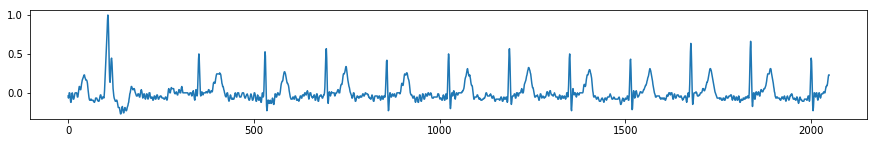

In [6]:
plt.figure(figsize=(15,2))
plt.plot(indata);

In [7]:
ae = encoders.convautoencoder()
emb = ae.encode(indata)
recon = ae.decode(emb)

/home/cohenjos/.local/lib/python3.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'model.Autoencoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/cohenjos/.local/lib/python3.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'model.ConvAutoencoder' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [ ]:
plt.figure(figsize=(15,2))
plt.plot(emb);

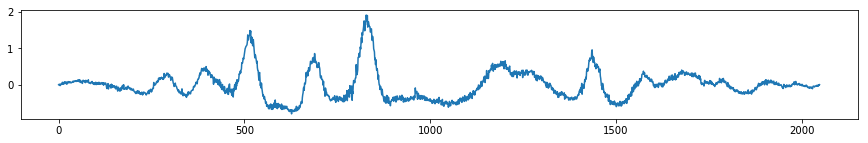

In [8]:
plt.figure(figsize=(15,2))
plt.plot(recon[0][0]);

In [12]:
#enc = encoders.fft()
enc = encoders.convautoencoder()
#enc = encoders.none()
#enc = encoders.biosppy_mean_beat()
newdata = []
for emb in data_raw.values:
    newdata.append(enc.encode(emb))
data = np.asarray(newdata)

In [13]:
select = (labels["rtype"] == 3) | (labels["rtype"] == 4) | (labels["rtype"] == 5)
labels2 = labels[select]
data2 = data[select]

In [14]:
labels2.shape

(5906, 5)

In [15]:
limit = 9000
emb = data2[:limit]
from sklearn.manifold import TSNE
model = TSNE(n_components=2,random_state=1, perplexity=30)
edata = model.fit_transform(emb)

In [27]:
%matplotlib inline

In [16]:
def highlight(X,Y):
    return (X < -50) & \
           (Y > 30)

In [20]:
def highlight(X,Y):
    return (X > -5) & \
           (X < 5) & \
           (Y < -35) & \
           (Y > -45)

In [85]:
#x1, x2, y1, y2 = 25, 40,    12, 25
x1, x2, y1, y2 = -60, -55,    20, 25
def highlight(X,Y):
    return (X > x1) & \
           (X < x2) & \
           (Y > y1) & \
           (Y < y2)

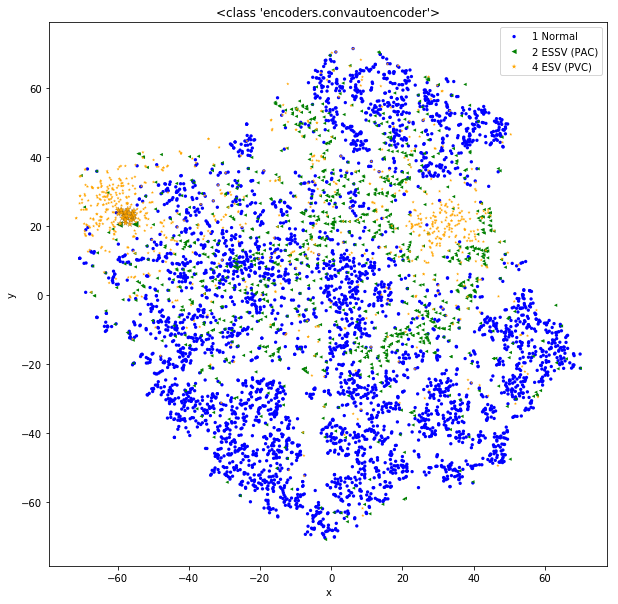

In [86]:
plt.figure(figsize=(10,10))
selected_labels = labels2["btype"][:limit]
X_embedded = edata
np.random.seed(0)
markers = ["+","o","<",".","*",">",",","p","3"]
colors = ["red","blue","green","yellow", "orange", "black", "purple"]
for cat in np.unique(selected_labels):
    i_cat = np.where(selected_labels == cat)
    
    X = X_embedded[i_cat][:,0]
    Y = X_embedded[i_cat][:,1]

    size = np.ones(X.shape)+10
    size[highlight(X,Y)] = 40
    
    linewidths = np.zeros(X.shape)
    linewidths[highlight(X,Y)] = 0.1
    
    plt.scatter(X, Y, 
                label=utils.btype_names[cat], 
                marker=markers[cat], 
                color=colors[cat],
                s=size,
                linewidths=linewidths,
                edgecolors="black");
    plt.xlabel("x")
    plt.ylabel("y")
plt.title(enc)
plt.legend();

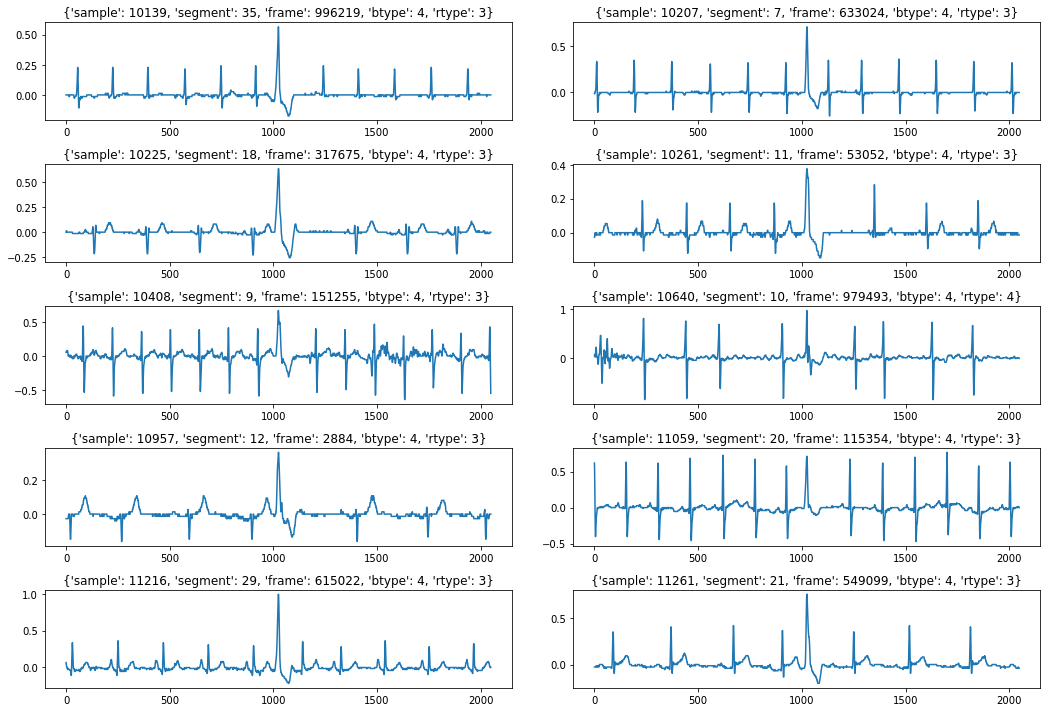

In [88]:
frames = data_raw[select][highlight(X_embedded[:,0],X_embedded[:,1])]
frame_labels = labels[select][highlight(X_embedded[:,0],X_embedded[:,1])]
plt.figure(figsize=(15,10))
rows, columns = 5, 2
for i, ((id, frame),(id,label)) in enumerate(zip(frames[:10].iterrows(),frame_labels[:10].iterrows())):
    plt.subplot(rows, columns, i+1)
    plt.plot(frame.values);
    plt.title(dict(label))
plt.tight_layout()
plt.show()

In [77]:
# for i, frame in data_raw[select][highlight(X_embedded[:,0],X_embedded[:,1])][:10].iterrows():
#     plt.figure(figsize=(15,2))
#     plt.title(i)
#     plt.plot(frame.values);
#     plt.show()

In [68]:
i_cat = np.where(selected_labels == 4)

In [74]:
i_cat

(array([   4,    5,   11, ..., 8993, 8995, 8996]),)

In [75]:
low = np.where(edata[:,0] < -50)

In [84]:
edata[25]

array([-71.131775,   2.449017], dtype=float32)

In [85]:
labels2[25]

KeyError: 25

In [83]:
[x for x in low[0] if x in list(i_cat[0])]

[25,
 57,
 139,
 177,
 178,
 181,
 217,
 218,
 232,
 233,
 234,
 249,
 251,
 254,
 258,
 269,
 276,
 280,
 292,
 304,
 341,
 351,
 359,
 368,
 399,
 434,
 474,
 477,
 478,
 483,
 554,
 556,
 558,
 572,
 574,
 599,
 603,
 631,
 633,
 634,
 650,
 667,
 696,
 697,
 703,
 705,
 743,
 767,
 805,
 824,
 861,
 862,
 890,
 933,
 936,
 979,
 982,
 1095,
 1097,
 1100,
 1111,
 1134,
 1163,
 1169,
 1171,
 1200,
 1246,
 1247,
 1248,
 1249,
 1270,
 1305,
 1309,
 1382,
 1399,
 1437,
 1440,
 1442,
 1443,
 1448,
 1490,
 1491,
 1492,
 1495,
 1496,
 1499,
 1501,
 1502,
 1505,
 1506,
 1524,
 1531,
 1537,
 1553,
 1555,
 1556,
 1562,
 1572,
 1573,
 1575,
 1693,
 1697,
 1698,
 1727,
 1732,
 1760,
 1765,
 1816,
 1818,
 1876,
 1894,
 1898,
 1899,
 1916,
 1936,
 1976,
 1997,
 2038,
 2088,
 2096,
 2099,
 2109,
 2112,
 2116,
 2139,
 2153,
 2157,
 2226,
 2228,
 2282,
 2293,
 2302,
 2303,
 2304,
 2306,
 2321,
 2350,
 2366,
 2384,
 2392,
 2413,
 2451,
 2453,
 2471,
 2496,
 2498,
 2506,
 2509,
 2513,
 2537,
 2550,
 2

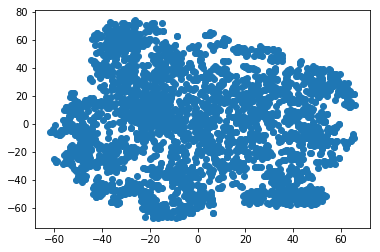

In [69]:
plt.scatter(x=edata[:,0], y=edata[:,1]);

TypeError: You must first set_array for mappable

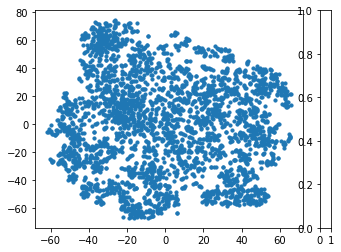

In [67]:
#plt.figure(figsize=(20,10))
scatter = plt.scatter(x=edata[:,0], y=edata[:,1], c=labels2["label"][:limit].astype(int), s=10);
plt.colorbar();

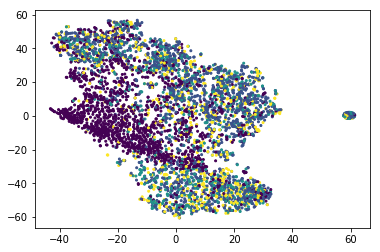

In [15]:
scatter = plt.scatter(x=edata[:,0], y=edata[:,1], c=labels["label"][:limit].astype(int), s=4);

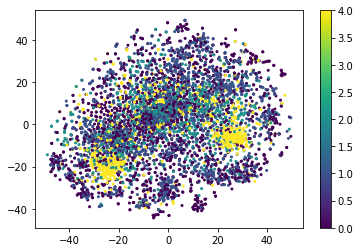

In [161]:
scatter = plt.scatter(x=edata[:,0], y=edata[:,1],c=labels["label"].astype(int), s=4);
plt.colorbar();

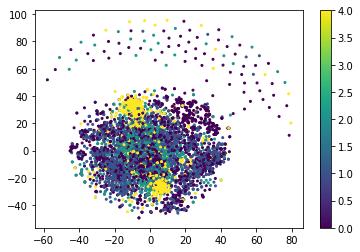

In [147]:
scatter = plt.scatter(x=edata[:,0], y=edata[:,1],c=labels["label"].astype(int), s=4);
plt.colorbar();

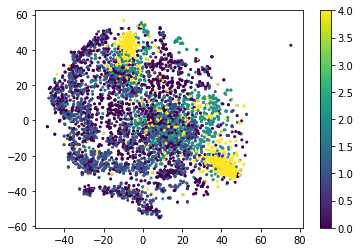

In [143]:
scatter = plt.scatter(x=edata[:,0], y=edata[:,1],c=labels["label"].astype(int), s=4);
plt.colorbar();

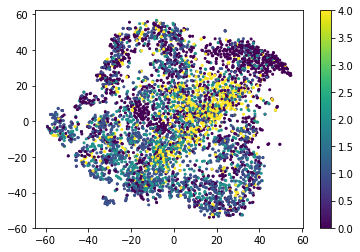

In [136]:
scatter = plt.scatter(x=edata[:,0], y=edata[:,1],c=labels["label"].astype(int), s=4);
plt.colorbar();

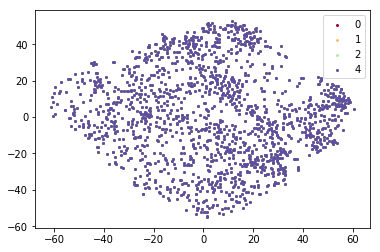

In [10]:
cmap = plt.cm.get_cmap('Spectral')
for i in labels["label"].astype(int).unique():
    toselect = np.where(labels[:limit]["label"].astype(int) == 0)[0]
    plt.scatter(x=edata[toselect,0], y=edata[toselect,1],color=cmap(i/3.0), label=i, s=4);
plt.legend();